<a href="https://colab.research.google.com/github/paulo-santos-ds/MachineLearningLogisticRegression/blob/main/FraudeCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo Fraude de Cartão de Credito



Apesar do surgimento constante de novos meios de pagamento, como pix e whatsapp, boletos ate mesmos o cashback o cartão de crédito ainda concentra grande parte das transações do varejo brasileiro, justamente pela enorme quantidade de transações que isso significa mais de 2,65 trilhões de reais somente em 2021 alta de 33,1%, segundo  Associação Brasileira das Empresas de Cartões de Crédito(Abecs ).

### Importação das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Importado os dados da fonte: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) responde por 0,172%

## Lendo os Dados

In [ ]:
df_credit = pd.read_csv('/content/creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Observando Tipo de Valores

In [ ]:
df_credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Procurando Valores nulos

In [ ]:
df_credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Estatistica dos valores sem Fraude

In [ ]:
df_sem_fraude = df_credit.Amount[df_credit.Class == 0]
df_sem_fraude.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## Estatistica dos valores Fraude

In [ ]:
df_fraude = df_credit.Amount[df_credit.Class == 1]
df_fraude.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Observando o Desbalanceamento dos Dados

In [ ]:
df_credit.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Grafico demonstra o desbalanceamento dos dados

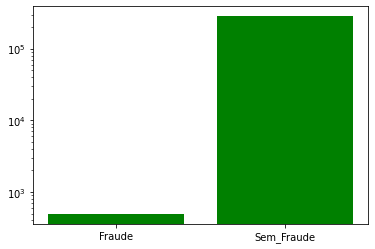

In [ ]:
x = np.array(["Fraude", "Sem_Fraude"])
y = np.array([492, 284315])
plt.yscale('log')
plt.bar(x, y, color = 'green' )
plt.show()



## Verificação de Dados sem Fraude

In [ ]:
df_sem_fraude = df_credit[df_credit.Class == 0]
df_sem_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Verificação de Dados com Fraude

In [ ]:
df_fraude = df_credit[df_credit.Class == 1]
df_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Balanceamento de dados sem Fraude com dados Fraudados

In [ ]:
df_sem_fraude = df_sem_fraude.sample(n=492)
df_sem_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
271431,164571.0,2.056921,0.115713,-1.703530,0.434255,0.369509,-0.902838,0.180303,-0.226784,0.528092,...,-0.360412,-0.963090,0.339659,0.561756,-0.273756,0.169597,-0.065792,-0.029242,9.85,0
281237,170024.0,0.070893,0.935948,-0.975433,-0.691433,1.592652,-0.432971,1.447298,-0.432400,-0.299742,...,-0.044828,0.074564,-0.202987,0.234837,-0.021612,0.410629,-0.466000,-0.240596,18.92,0
277674,167788.0,-4.097093,3.132488,-1.802347,-2.665912,1.939195,3.571644,-0.272957,1.180333,2.820322,...,-0.600650,-0.728091,0.085168,0.521766,0.077112,-0.474100,-1.268656,-1.026944,0.68,0
113140,72950.0,-1.346252,-0.460331,0.942324,-4.345720,-0.469936,0.297471,-0.280149,0.833253,0.525409,...,-0.049632,0.514316,0.154560,-0.648406,-0.163617,-0.982827,0.369792,0.099665,61.86,0
154067,100866.0,1.953483,-0.556817,0.235112,0.586615,-1.156548,-0.423572,-1.095156,0.059928,2.918889,...,-0.125836,-0.045338,0.352660,-0.092052,-0.695401,0.450781,-0.047757,-0.047088,15.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120980,76031.0,-0.199021,0.326141,2.203261,0.951418,-0.499144,0.330264,-0.302198,0.230208,0.340180,...,0.301583,1.096072,-0.091651,-0.008760,-0.516037,-0.214795,0.235985,-0.072351,24.75,0
107098,70279.0,-1.056164,0.640622,1.339071,0.725652,-0.046162,0.120039,1.182567,-0.507384,0.919572,...,-0.165294,-0.060288,-0.093443,0.011760,0.046419,-0.460466,-0.980174,-0.455522,79.99,0
17793,28922.0,1.144821,-0.181884,0.580059,-0.111454,-0.385964,0.268749,-0.498075,0.299849,0.142939,...,-0.031301,-0.078284,0.151767,-0.243821,-0.075895,0.916084,-0.043071,-0.007722,3.00,0
154406,101438.0,1.909839,-0.142119,-1.121473,0.555823,0.140107,-0.643023,0.068601,-0.333524,1.344141,...,0.074915,0.428857,-0.001673,-0.325637,-0.022874,0.336677,-0.096776,-0.066306,73.98,0


## Concatenando dados sem Fraude com Fraudados

In [ ]:
df = pd.concat([df_sem_fraude,df_fraude], axis = 0)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
271431,164571.0,2.056921,0.115713,-1.703530,0.434255,0.369509,-0.902838,0.180303,-0.226784,0.528092,...,-0.360412,-0.963090,0.339659,0.561756,-0.273756,0.169597,-0.065792,-0.029242,9.85,0
281237,170024.0,0.070893,0.935948,-0.975433,-0.691433,1.592652,-0.432971,1.447298,-0.432400,-0.299742,...,-0.044828,0.074564,-0.202987,0.234837,-0.021612,0.410629,-0.466000,-0.240596,18.92,0
277674,167788.0,-4.097093,3.132488,-1.802347,-2.665912,1.939195,3.571644,-0.272957,1.180333,2.820322,...,-0.600650,-0.728091,0.085168,0.521766,0.077112,-0.474100,-1.268656,-1.026944,0.68,0
113140,72950.0,-1.346252,-0.460331,0.942324,-4.345720,-0.469936,0.297471,-0.280149,0.833253,0.525409,...,-0.049632,0.514316,0.154560,-0.648406,-0.163617,-0.982827,0.369792,0.099665,61.86,0
154067,100866.0,1.953483,-0.556817,0.235112,0.586615,-1.156548,-0.423572,-1.095156,0.059928,2.918889,...,-0.125836,-0.045338,0.352660,-0.092052,-0.695401,0.450781,-0.047757,-0.047088,15.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Ajuste de Numeração index ordem Crescente

In [ ]:
df.reset_index(inplace = True)
df

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,271431,164571.0,2.056921,0.115713,-1.703530,0.434255,0.369509,-0.902838,0.180303,-0.226784,...,-0.360412,-0.963090,0.339659,0.561756,-0.273756,0.169597,-0.065792,-0.029242,9.85,0
1,281237,170024.0,0.070893,0.935948,-0.975433,-0.691433,1.592652,-0.432971,1.447298,-0.432400,...,-0.044828,0.074564,-0.202987,0.234837,-0.021612,0.410629,-0.466000,-0.240596,18.92,0
2,277674,167788.0,-4.097093,3.132488,-1.802347,-2.665912,1.939195,3.571644,-0.272957,1.180333,...,-0.600650,-0.728091,0.085168,0.521766,0.077112,-0.474100,-1.268656,-1.026944,0.68,0
3,113140,72950.0,-1.346252,-0.460331,0.942324,-4.345720,-0.469936,0.297471,-0.280149,0.833253,...,-0.049632,0.514316,0.154560,-0.648406,-0.163617,-0.982827,0.369792,0.099665,61.86,0
4,154067,100866.0,1.953483,-0.556817,0.235112,0.586615,-1.156548,-0.423572,-1.095156,0.059928,...,-0.125836,-0.045338,0.352660,-0.092052,-0.695401,0.450781,-0.047757,-0.047088,15.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Separação de dados para Validação 20 primeiros

In [ ]:
df_valor_sem_fraude = df.head(20)
df_valor_sem_fraude 

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,271431,164571.0,2.056921,0.115713,-1.703530,0.434255,0.369509,-0.902838,0.180303,-0.226784,...,-0.360412,-0.963090,0.339659,0.561756,-0.273756,0.169597,-0.065792,-0.029242,9.85,0
1,281237,170024.0,0.070893,0.935948,-0.975433,-0.691433,1.592652,-0.432971,1.447298,-0.432400,...,-0.044828,0.074564,-0.202987,0.234837,-0.021612,0.410629,-0.466000,-0.240596,18.92,0
2,277674,167788.0,-4.097093,3.132488,-1.802347,-2.665912,1.939195,3.571644,-0.272957,1.180333,...,-0.600650,-0.728091,0.085168,0.521766,0.077112,-0.474100,-1.268656,-1.026944,0.68,0
3,113140,72950.0,-1.346252,-0.460331,0.942324,-4.345720,-0.469936,0.297471,-0.280149,0.833253,...,-0.049632,0.514316,0.154560,-0.648406,-0.163617,-0.982827,0.369792,0.099665,61.86,0
4,154067,100866.0,1.953483,-0.556817,0.235112,0.586615,-1.156548,-0.423572,-1.095156,0.059928,...,-0.125836,-0.045338,0.352660,-0.092052,-0.695401,0.450781,-0.047757,-0.047088,15.95,0
5,73553,55184.0,0.941714,-0.367136,1.120568,1.106461,-0.674869,0.932018,-0.798270,0.543695,...,0.099160,0.295463,0.023285,-0.327396,0.148680,-0.372619,0.079751,0.027165,55.60,0
6,153362,98728.0,-0.585509,0.421993,0.943889,-0.938467,1.186810,1.426493,0.454290,0.369052,...,0.053258,0.464628,-0.072141,-1.640997,-0.434873,0.599844,0.079582,0.111834,53.71,0
7,260556,159615.0,-0.564763,0.822686,0.948227,-0.698162,0.377789,0.116930,0.300907,0.314312,...,0.258371,0.895033,-0.260623,0.654636,-0.148259,0.602461,0.351311,0.227057,19.99,0
8,212118,138724.0,-0.835674,0.443743,-0.134109,-0.516823,1.245593,-0.945101,1.459739,-0.298973,...,0.331453,0.708529,-0.197901,-0.712917,0.600159,-0.045908,0.050890,0.155942,137.53,0
9,35807,38275.0,0.642049,0.197732,1.028119,0.609740,-0.918675,0.212321,-0.400491,0.263142,...,0.293403,0.894449,0.386424,0.239778,-1.320036,0.213296,-0.122695,-0.138259,42.90,0


## Separação de dados para Validação 20 ultimos

In [ ]:
df_valor_fraude = df.tail(20)
df_valor_fraude

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
964,261473,160034.0,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,...,-0.088519,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,4.90,1
965,261925,160243.0,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,...,0.203563,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,156.00,1
966,262560,160537.0,0.567539,3.309385,-6.631268,6.394574,-0.054172,-2.396535,-2.792489,0.514811,...,0.614221,-0.365047,-0.180409,-0.523271,0.645054,0.246466,0.902675,0.473571,4.69,1
967,262826,160665.0,-0.417340,4.700055,-7.521767,7.671884,0.260821,-2.646693,-2.854432,0.958783,...,0.622200,-0.437708,-0.090358,-0.742802,-0.312361,0.502575,0.821390,0.372379,0.77,1
968,263080,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
969,263274,160870.0,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,...,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,1
970,263324,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1
971,263877,161154.0,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,...,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,0.38,1
972,268375,163181.0,-5.238808,0.623013,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-0.695173,...,-0.326140,1.509239,-0.215966,-0.245727,0.893041,0.865758,0.854657,-0.964482,39.98,1
973,272521,165132.0,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,...,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,12.31,1


## Retirando 20 primeiras e 20 ultimas linhas

In [ ]:
df = df.iloc[20:]
df = df[:-20]
df

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
20,182275,125329.0,-1.215858,-1.650160,0.334612,-3.868649,2.132059,3.607568,-0.021088,0.491672,...,-0.647705,-1.232891,0.059033,0.656340,0.251474,-0.398578,-0.370093,-0.233479,174.07,0
21,82999,59646.0,1.274163,0.414063,-0.033853,0.920460,0.266021,-0.450671,0.335275,-0.280055,...,0.001111,0.101484,-0.236981,-0.409455,0.849685,-0.283042,0.020660,0.018032,20.00,0
22,102307,68136.0,0.881804,-0.061385,1.190737,3.217111,-0.852709,0.441914,-0.592057,0.240693,...,0.027645,0.275331,-0.237736,0.357942,0.549173,0.214888,0.058749,0.074410,104.96,0
23,200647,133516.0,0.036837,0.249941,0.936484,1.174419,-0.101064,-0.191060,0.080244,0.127522,...,0.442280,1.374330,0.131946,-0.111655,-1.316621,-0.522679,0.354593,0.305750,39.95,0
24,831,634.0,1.092046,-0.257599,0.327828,0.709777,-0.499339,-0.208212,-0.124638,0.078494,...,-0.177570,-0.557918,-0.082042,0.001970,0.407333,0.269729,-0.045557,0.007649,68.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,254395,156710.0,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-0.395603,...,0.242560,0.841230,-0.370157,-0.026012,0.491954,0.234576,-0.279788,-0.331933,7.59,1
960,255403,157207.0,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,...,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,4.97,1
961,255556,157284.0,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,0.77,1
962,258403,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,...,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1


## Concatenar o DataFrame de Validação

In [ ]:
df_valor_total = pd.concat([df_valor_sem_fraude, df_valor_fraude])

df_valor_total.reset_index(inplace = True )
df_valor_total_real = df_valor_total.Class
df_valor_total = df_valor_total.drop(['level_0','index','Time', 'Class'], axis=1)
df_valor_total

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2.056921,0.115713,-1.703530,0.434255,0.369509,-0.902838,0.180303,-0.226784,0.528092,-0.374754,...,-0.156317,-0.360412,-0.963090,0.339659,0.561756,-0.273756,0.169597,-0.065792,-0.029242,9.85
1,0.070893,0.935948,-0.975433,-0.691433,1.592652,-0.432971,1.447298,-0.432400,-0.299742,-0.442283,...,-0.097461,-0.044828,0.074564,-0.202987,0.234837,-0.021612,0.410629,-0.466000,-0.240596,18.92
2,-4.097093,3.132488,-1.802347,-2.665912,1.939195,3.571644,-0.272957,1.180333,2.820322,2.754783,...,1.221933,-0.600650,-0.728091,0.085168,0.521766,0.077112,-0.474100,-1.268656,-1.026944,0.68
3,-1.346252,-0.460331,0.942324,-4.345720,-0.469936,0.297471,-0.280149,0.833253,0.525409,-2.020157,...,-0.551700,-0.049632,0.514316,0.154560,-0.648406,-0.163617,-0.982827,0.369792,0.099665,61.86
4,1.953483,-0.556817,0.235112,0.586615,-1.156548,-0.423572,-1.095156,0.059928,2.918889,-0.350883,...,-0.320057,-0.125836,-0.045338,0.352660,-0.092052,-0.695401,0.450781,-0.047757,-0.047088,15.95
5,0.941714,-0.367136,1.120568,1.106461,-0.674869,0.932018,-0.798270,0.543695,0.662100,-0.052087,...,-0.167390,0.099160,0.295463,0.023285,-0.327396,0.148680,-0.372619,0.079751,0.027165,55.60
6,-0.585509,0.421993,0.943889,-0.938467,1.186810,1.426493,0.454290,0.369052,0.923216,-1.189157,...,-0.064196,0.053258,0.464628,-0.072141,-1.640997,-0.434873,0.599844,0.079582,0.111834,53.71
7,-0.564763,0.822686,0.948227,-0.698162,0.377789,0.116930,0.300907,0.314312,0.028198,-0.987325,...,0.139887,0.258371,0.895033,-0.260623,0.654636,-0.148259,0.602461,0.351311,0.227057,19.99
8,-0.835674,0.443743,-0.134109,-0.516823,1.245593,-0.945101,1.459739,-0.298973,-0.482316,-1.440005,...,0.379679,0.331453,0.708529,-0.197901,-0.712917,0.600159,-0.045908,0.050890,0.155942,137.53
9,0.642049,0.197732,1.028119,0.609740,-0.918675,0.212321,-0.400491,0.263142,0.311766,0.261979,...,-0.117729,0.293403,0.894449,0.386424,0.239778,-1.320036,0.213296,-0.122695,-0.138259,42.90


## Observar a Distribuição dos dados a ser Analisados

In [ ]:
df.Class.value_counts()

0    472
1    472
Name: Class, dtype: int64

## Separação Labels e Features

In [ ]:
X = df.drop(['index','Time','Class'], axis=1)
Y = df['Class']
X,Y 

(           V1        V2        V3        V4        V5        V6        V7  \
 20  -1.215858 -1.650160  0.334612 -3.868649  2.132059  3.607568 -0.021088   
 21   1.274163  0.414063 -0.033853  0.920460  0.266021 -0.450671  0.335275   
 22   0.881804 -0.061385  1.190737  3.217111 -0.852709  0.441914 -0.592057   
 23   0.036837  0.249941  0.936484  1.174419 -0.101064 -0.191060  0.080244   
 24   1.092046 -0.257599  0.327828  0.709777 -0.499339 -0.208212 -0.124638   
 ..        ...       ...       ...       ...       ...       ...       ...   
 959  0.202402  1.176270  0.346379  2.882138  1.407133 -0.504355  1.438537   
 960  1.170756  2.501038 -4.986159  5.374160  0.997798 -1.259004 -1.237689   
 961 -0.242245  4.147186 -5.672349  6.493741  1.591168 -1.602523 -0.950463   
 962 -5.976119 -7.196980 -5.388316  5.104799  4.676533 -5.566870 -4.291180   
 963 -0.408111  3.132944 -3.098030  5.803893  0.890609 -0.501474 -0.440054   
 
            V8        V9       V10  ...       V20       V21   

## Separação Dados de Treino e Teste

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 30, stratify=Y)

## Treinamento do Modelo

In [ ]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train,Y_train)
pred = logreg.predict(X_test)
ac = accuracy_score(Y_test, pred)


## Acuracia

In [ ]:
print('acuracia',round(ac*100,2))

acuracia 94.37


## Validação

In [ ]:
pred = logreg.predict(df_valor_total)
df = pd.DataFrame({'real':df_valor_total_real,'Previsto':pred})
print(df)

    real  Previsto
0      0         0
1      0         0
2      0         0
3      0         0
4      0         0
5      0         0
6      0         0
7      0         0
8      0         0
9      0         0
10     0         0
11     0         0
12     0         0
13     0         0
14     0         0
15     0         0
16     0         1
17     0         0
18     0         0
19     0         0
20     1         1
21     1         1
22     1         1
23     1         1
24     1         0
25     1         1
26     1         1
27     1         1
28     1         1
29     1         1
30     1         1
31     1         1
32     1         0
33     1         0
34     1         1
35     1         1
36     1         1
37     1         1
38     1         1
39     1         0


# Conclusão

A fraude de crédito é uma ameaça constante para instituições financeiras e seus clientes. O Machine Learning pode ser uma ferramenta valiosa para detectar e prevenir a fraude de crédito, utilizando técnicas como análise de anomalias, redes neurais e árvores de decisão. Essas técnicas permitem identificar padrões suspeitos e anomalias nos dados de transações, ajudando a identificar fraudes em potencial antes que elas ocorram. É importante lembrar que o Machine Learning não é uma solução completa para a fraude de crédito e deve ser usado em conjunto com outras medidas de segurança e com a experiência de profissionais especializados na área.